In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import numpy as np
import pandas as pd
import matplotlib as mpl

In [18]:
births = pd.read_csv('data/births.csv')
print(births.shape)
quartilis = np.percentile(births['births'], [25,50,75])
mu, sig = quartilis[1], 0.74 * (quartilis[2]-quartilis[0])
births = births.query('(births > @mu -5 * @sig) & (births < @mu + 5*@sig)')
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

(15547, 5)


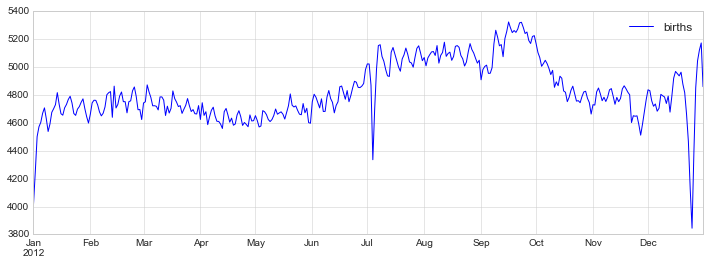

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

[Text(0, 0.5, 'average daily births'),
 Text(0.5, 1.0, 'USA births by day of year (1969-1988)')]

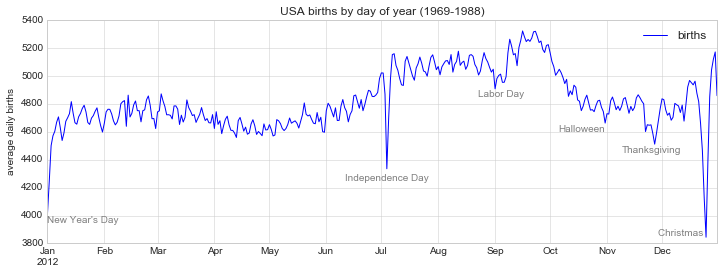

In [20]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));